## Review of Retail Sales Data 2024

In [68]:
# Importing necessary libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [69]:
# Importing the file
df = pd.read_csv("C:/Users/Mandi/Downloads/retail_sales_data.csv")
df.head()

,Store ID,Date,Total Sales,Region,Product Category,Units Sold
0,Store_7,2024-12-26,4080.97,Mombasa,Electronics,92
1,Store_4,2024-10-12,4895.46,Nairobi,Electronics,86
2,Store_8,2024-09-29,3363.09,Nairobi,Electronics,14
3,Store_5,2024-03-02,7602.29,Nairobi,Home & Living,71
4,Store_7,2024-03-24,5275.84,Nairobi,Electronics,86


In [70]:
# Shape of the data
df.shape

(500, 6)

In [71]:
# Checking column types
df.dtypes

Store ID             object
Date                 object
Total Sales         float64
Region               object
Product Category     object
Units Sold            int64
dtype: object

In [73]:
# Checking for duplicated rows
duplicates = df.duplicated().sum()
print(f"Duplicated rows: {duplicates}")

Duplicated rows: 0


In [74]:
# Checking for missing values
missing = df.isnull().sum()
print("Missing values per column:\n", missing)

Missing values per column:
 Store ID            0
Date                0
Total Sales         0
Region              0
Product Category    0
Units Sold          0
dtype: int64


In [75]:
# checking all information
df.info

<bound method DataFrame.info of     Store ID        Date  Total Sales   Region Product Category  Units Sold
0    Store_7  2024-12-26      4080.97  Mombasa      Electronics          92
1    Store_4  2024-10-12      4895.46  Nairobi      Electronics          86
2    Store_8  2024-09-29      3363.09  Nairobi      Electronics          14
3    Store_5  2024-03-02      7602.29  Nairobi    Home & Living          71
4    Store_7  2024-03-24      5275.84  Nairobi      Electronics          86
..       ...         ...          ...      ...              ...         ...
495  Store_1  2024-03-29      6690.83   Kisumu    Home & Living          63
496  Store_7  2024-10-22      4001.00  Nairobi      Electronics          49
497  Store_7  2024-11-23      8711.40   Kisumu        Groceries          64
498  Store_9  2024-10-21      4995.49   Nakuru        Groceries          32
499  Store_3  2024-04-13      9697.84  Nairobi        Groceries           7

[500 rows x 6 columns]>

In [76]:
# Checking the statistical summary
df.describe()

,Total Sales,Units Sold
count,500.000000,500.000000
mean,5316.515760,49.254000
std,2791.164576,28.980843
min,544.000000,1.000000
25%,2799.700000,22.000000
50%,5429.340000,49.000000
75%,7746.085000,75.000000
max,9980.370000,99.000000


#### Data cleaning - general overview
The dataset was in good shape overall. It had the correct number of rows and columns, with no missing or duplicate values. After a quick cleanup of column names and formatting, the data was clear, consistent, and ready for analysis. No unusual values or errors were found during the initial review.


### Descriptive Analysis

In [86]:
# Preview unique values and data types
print(f"\nThe unique Regions and Product Categories values are:")
print(df['Region'].unique())
print(df['Product Category'].unique())


The unique Regions and Product Categories values are:
['Mombasa' 'Nairobi' 'Nakuru' 'Kisumu']
['Electronics' 'Home & Living' 'Groceries' 'Clothing']


In [79]:
# Which region had the highest sales overall?

region_sales = df.groupby('Region')['Total Sales'].sum().sort_values(ascending=False)
print(region_sales)

# Get the top region
top_region = region_sales.idxmax()
top_sales = region_sales.max()
print(f"\nTop Region is {top_region} with total sales of {top_sales:,.2f}")

Region
Nairobi    710256.84
Mombasa    710064.10
Nakuru     653163.53
Kisumu     584773.41
Name: Total Sales, dtype: float64

Top Region is Nairobi with total sales of 710,256.84


Nairobi recorded the highest total sales at KES 710,256.84, slightly surpassing Mombasa. 

In [80]:
# What was the average monthly sales across all stores?
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Total Sales'].sum()
avg_monthly_sales = monthly_sales.mean()

print(f"\nAverage Monthly Sales Across All Stores: {avg_monthly_sales:,.2f}")



Average Monthly Sales Across All Stores: 221,521.49


The average monthly sales across all stores were KES 221,521.49, indicating steady revenue generation throughout the year.

### Visualization

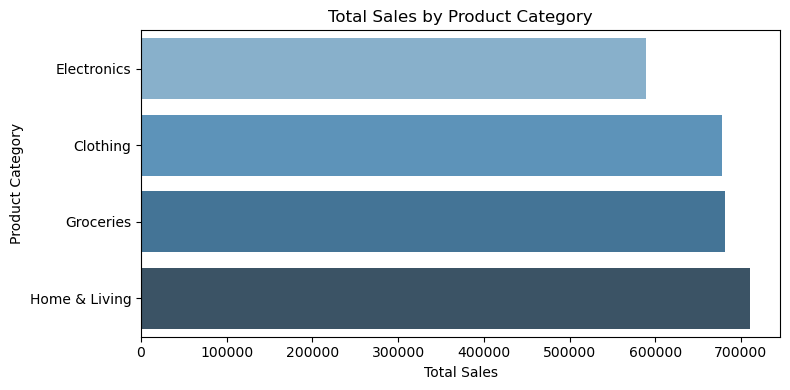

In [81]:
# Bar chart of total sales by product category.
category_sales = df.groupby('Product Category')['Total Sales'].sum().sort_values()

plt.figure(figsize=(8,4))
sns.barplot(x=category_sales.values, y=category_sales.index, palette="Blues_d")
plt.title("Total Sales by Product Category")
plt.xlabel("Total Sales")
plt.ylabel("Product Category")
plt.tight_layout()
plt.show()


The bar chart displays the total sales generated by each product category in 2024. Home & Living has the highest total sales among the four categories, followed closely by Groceries and Clothing. Electronics has the lowest sales, which may indicate less demand. This suggests a potential area for review concerning pricing and marketing strategies.

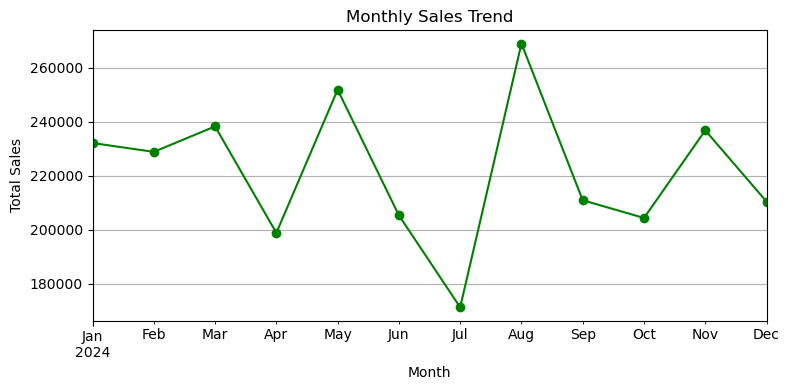

In [82]:
# Line chart showing monthly sales trends
monthly_sales = df.groupby('Month')['Total Sales'].sum()

plt.figure(figsize=(8,4))
monthly_sales.plot(kind='line', marker='o', color='green')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.show()


The line graph illustrates the monthly sales trends for the year 2024. Sales performance varied significantly throughout the year, with the highest sales recorded in August, indicating a potential peak season. Conversely, July saw the lowest sales, which may point to issues such as reduced demand or operational challenges. Notable dips also occurred in April and October, while May and November displayed strong recoveries.

### Insight Summary 

The Nairobi region generated the highest overall sales, which shows strong market performance. To capitalize on this, increasing product availability and strengthening marketing efforts to capitalize on consumer demand is advisable, especially in high-performing categories like Clothing, Groceries and Home and living.

There was a noticeable decline in sales during June and July, followed by a significant rebound in August. This pattern suggests seasonal demand, which may be influenced by promotional events, restocking cycles, or regional festivities. The dip in sales could also be attributed to an off-peak season, supply chain disruptions, or reduced customer engagement during those months.

#### Recommendation:

- Investigate the causes of the mid-year sales dips and boost sales through timely promotions.

- Align inventory planning and marketing calendars with seasonal demand cycles to prevent missed revenue opportunities.